# GRIP_JULY - 2021  (TASK 1)

# Task Name:- Object Detection

# Domain:- Computer Vision and IOT

# Name:- Akash Singh

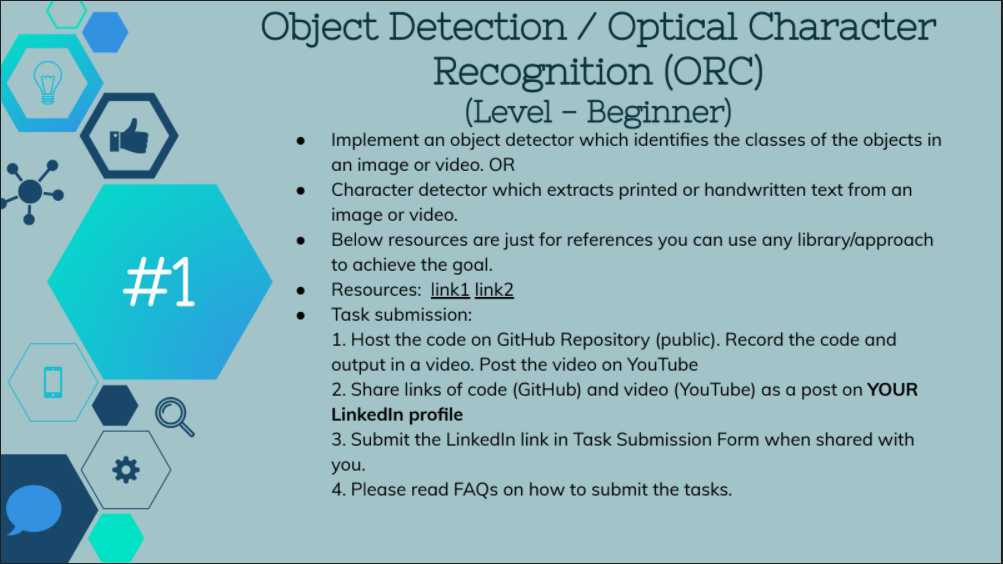

In [ ]:
import cv2
import numpy as np

In [ ]:
thres = 0.45
nms_threshold = 0.2

#Default Camera Capture
cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)
cap.set(10, 150)

In [ ]:
##Importing the COCO dataset in a list
classNames= []
classFile = 'coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [ ]:
##Configuring both SSD model and weights (assigning)
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

In [ ]:
##dnn-Inbuilt method of OpenCV
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

In [ ]:
## using Detect method
while True:
    success, img = cap.read()
    classIds, confs, bbox = net.detect(img, confThreshold=thres)
    bbox = list(bbox)
    confs = list(np.array(confs).reshape(1, -1)[0])
    confs = list(map(float, confs))

    indices = cv2.dnn.NMSBoxes(bbox, confs, thres, nms_threshold)

    for i in indices:
        i = i[0]
        box = bbox[i]
        x, y, w, h = box[0], box[1], box[2], box[3]
        cv2.rectangle(img, (x, y),(x+w, h+y), color=(0, 255, 0), thickness=2)
        cv2.putText(img,classNames[classIds[i][0]-1].upper(), (box[0]+10, box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255), 2)

    cv2.imshow("Output", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()